In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Statistical Tests
import scipy.stats as stats

# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import learning_curve

pd.options.display.float_format = '{:20,.2f}'.format

In [2]:
# get df
red = pd.read_csv('winequality-red.csv')
white = pd.read_csv('winequality-white.csv')

In [3]:
# shape
red.shape, white.shape

((1599, 12), (4898, 12))

In [4]:
# add color type
red['color'] = 'red'
white['color'] = 'white'

In [5]:
# merging table
df = pd.merge(red, white, how='outer')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [9]:
def remove_outliers(df, k=1.5):
    col_qs = {}
    df_cols = df.columns
    df_cols = df_cols.to_list()
    df_cols.remove('color')

    for col in df_cols:
        col_qs[col] = q1, q3 = df[col].quantile([0.25, 0.75])
        # print(col_qs)
    
    for col in df_cols:    
        iqr = col_qs[col][0.75] - col_qs[col][0.25]
        lower_fence = col_qs[col][0.25] - (iqr*k)
        upper_fence = col_qs[col][0.75] + (iqr*k)
        #print(f'Lower fence of {col}: {lower_fence}')
        #print(f'Upper fence of {col}: {upper_fence}')
        df = df[(df[col] > lower_fence) & (df[col] < upper_fence)]
    return df

In [10]:
remove_outliers(df)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
6,7.90,0.60,0.06,1.60,0.07,15.00,59.00,1.00,3.30,0.46,9.40,5,red
9,7.50,0.50,0.36,6.10,0.07,17.00,102.00,1.00,3.35,0.80,10.50,5,red
10,7.50,0.50,0.36,6.10,0.07,17.00,102.00,1.00,3.35,0.80,10.50,5,red
11,6.70,0.58,0.08,1.80,0.10,15.00,65.00,1.00,3.28,0.54,9.20,5,red
16,8.50,0.28,0.56,1.80,0.09,35.00,103.00,1.00,3.30,0.75,10.50,7,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.20,0.21,0.29,1.60,0.04,24.00,92.00,0.99,3.27,0.50,11.20,6,white
6493,6.60,0.32,0.36,8.00,0.05,57.00,168.00,0.99,3.15,0.46,9.60,5,white
6494,6.50,0.24,0.19,1.20,0.04,30.00,111.00,0.99,2.99,0.46,9.40,6,white
6495,5.50,0.29,0.30,1.10,0.02,20.00,110.00,0.99,3.34,0.38,12.80,7,white


### Train, val, split

In [11]:
# split test off, 20% of original df size. 
train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=42)

# split validate off, 30% of what remains (24% of original df size)
# thus train will be 56% of original df size. 
train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=42)

print("train observations: ", train.shape[0])
print("validate observations: ", validate.shape[0])
print("test observations: ", test.shape[0])


train observations:  3637
validate observations:  1560
test observations:  1300


In [12]:
target = 'quality'

In [ ]:
# Question: if we control for alcohol, does quality differ for others?

In [21]:
train.alcohol.value_counts(bins=3)

(7.992, 10.3]    1841
(10.3, 12.6]     1590
(12.6, 14.9]      206
Name: alcohol, dtype: int64

In [20]:
train.alcohol.mean()

10.491785354224943

In [ ]:
[for x in alcohol]

In [23]:
train['alcohol_level'] = pd.cut(train.alcohol, bins = [7.992, 10.3, 12.6, 14.9], labels=['low', 'avg', 'high'])

In [ ]:
train.alcohol_level

In [ ]:
train.columns

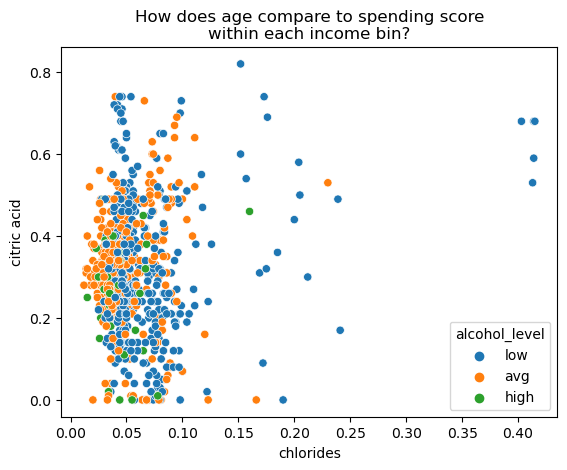

In [25]:
sns.scatterplot(x='chlorides', y='citric acid',
               data=train.sample(1000), hue='alcohol_level')
plt.title("How does age compare to spending score\nwithin each income bin?")
plt.show()

Interaction of variables along with younger vs older
(cutoff=40)


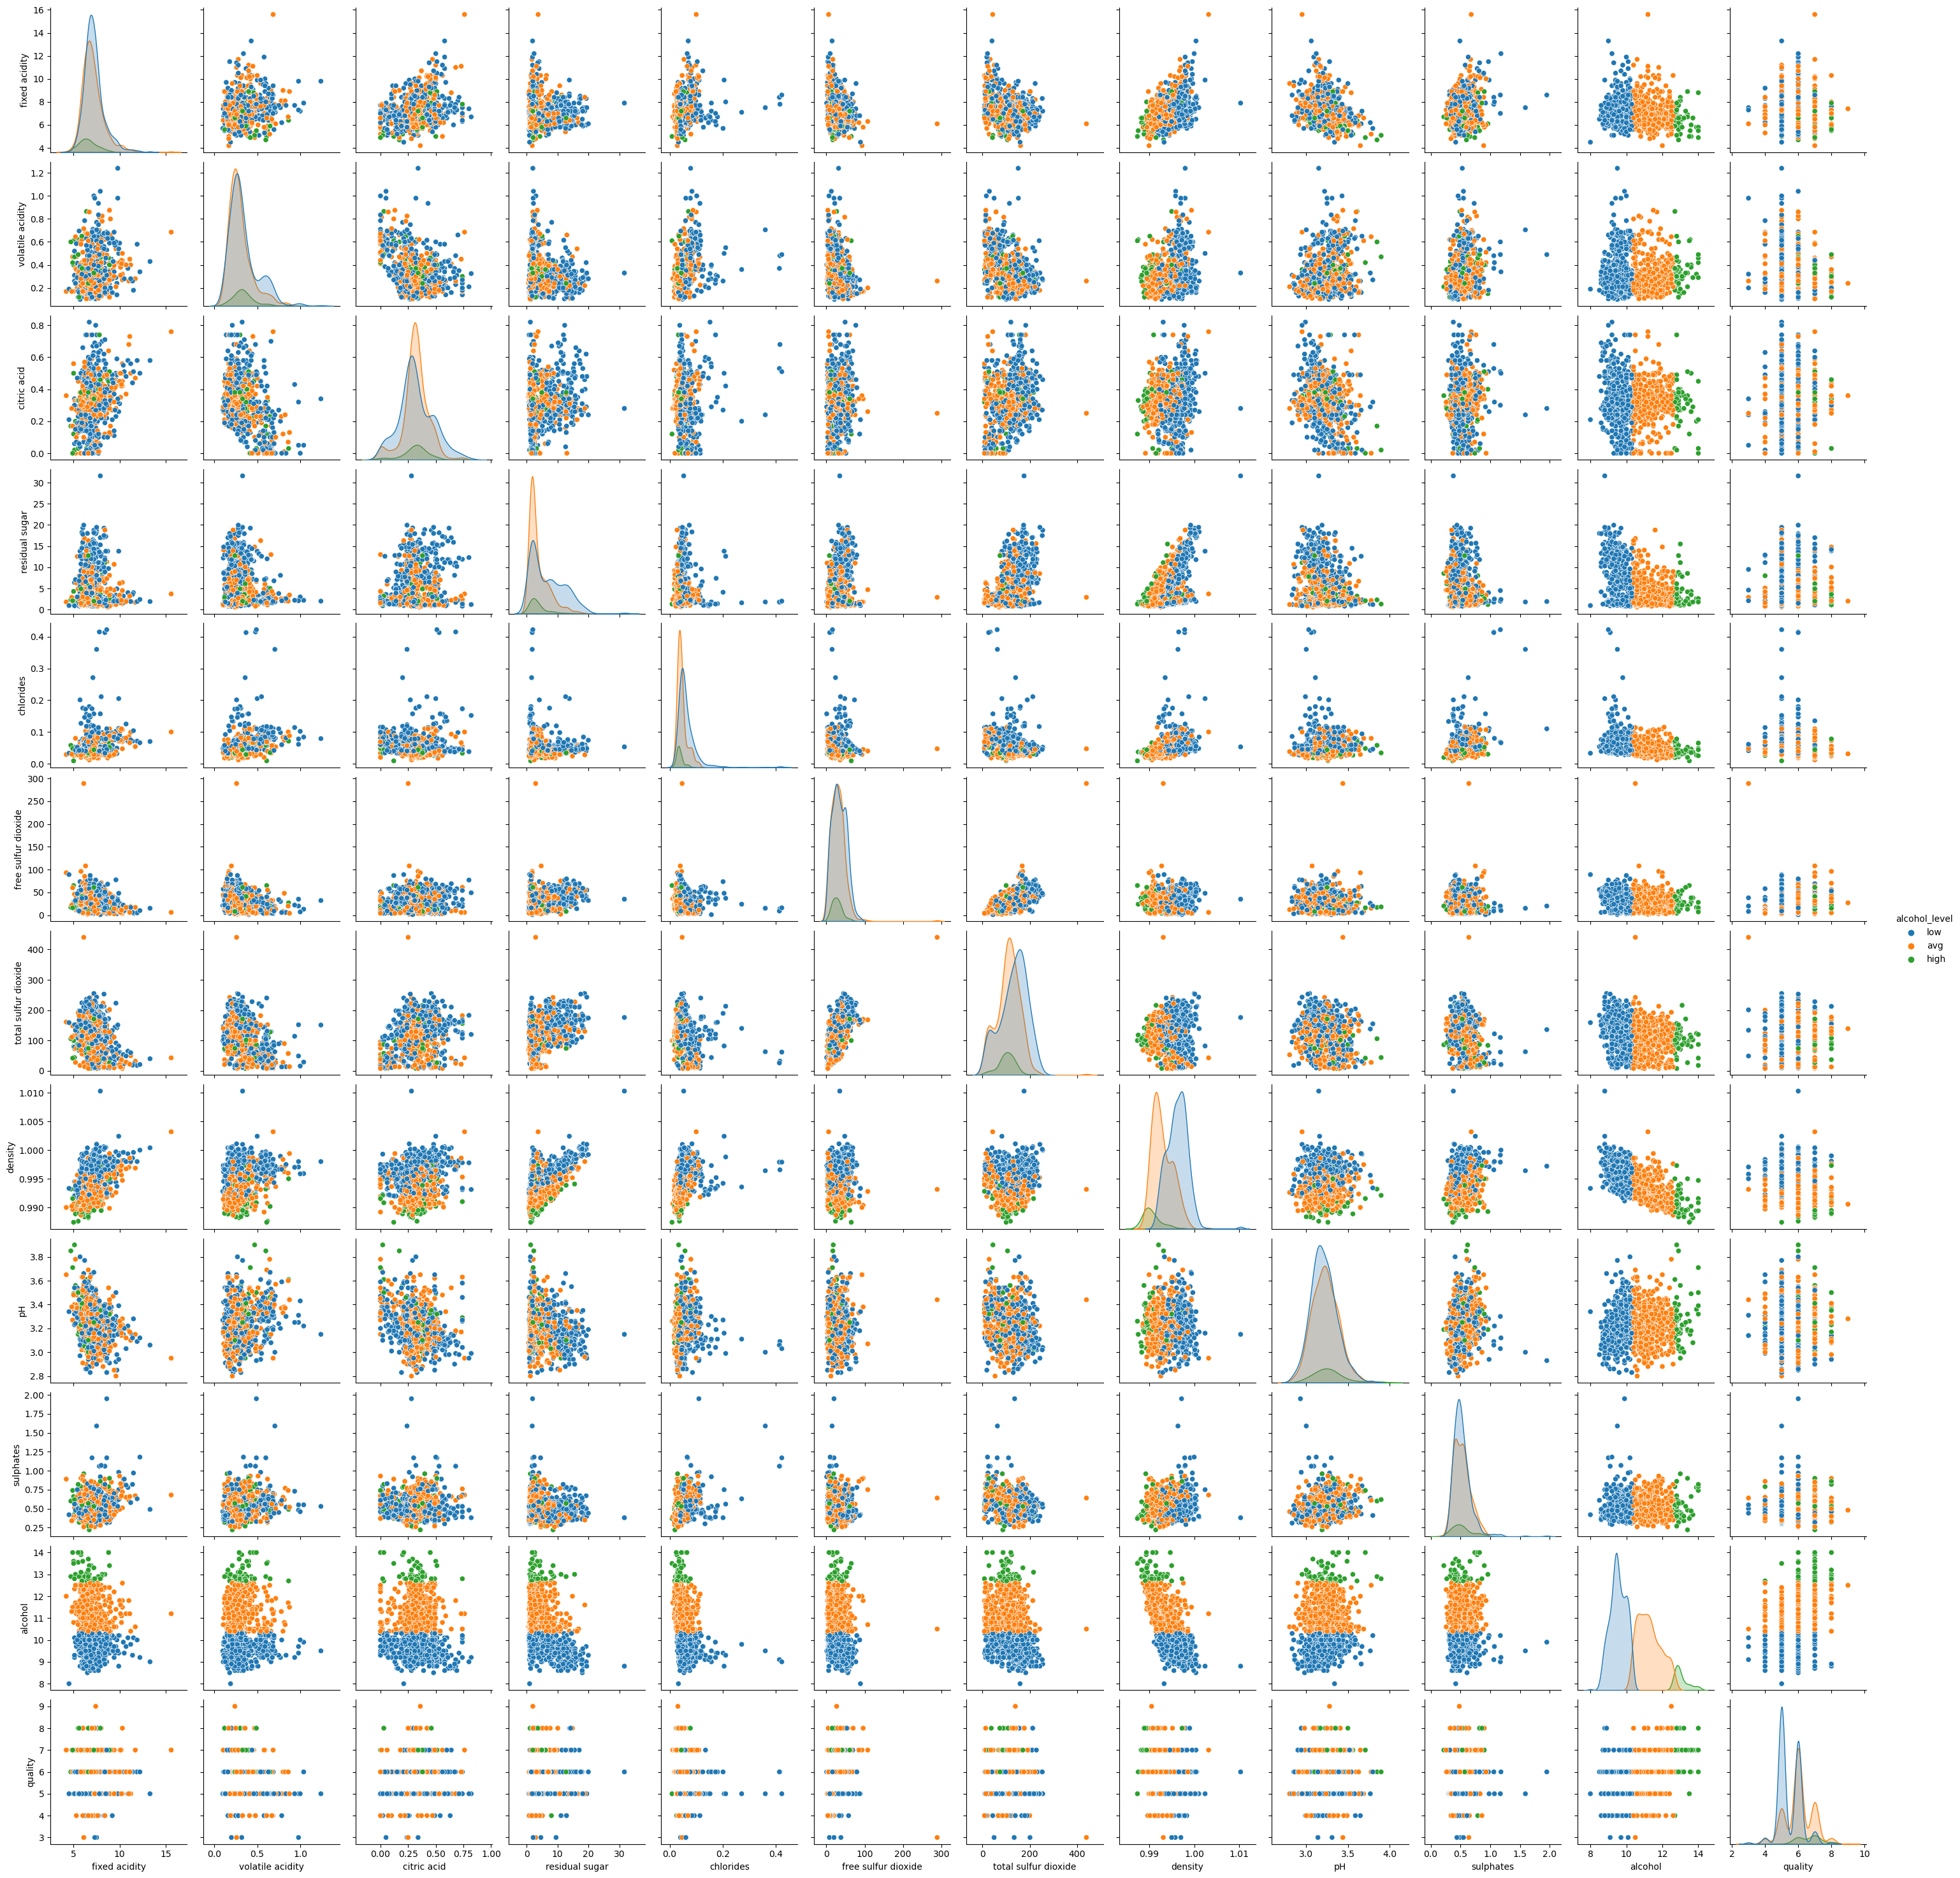

In [26]:
print("Interaction of variables along with younger vs older\n(cutoff=40)")
sns.pairplot(train.sample(1000), hue='alcohol_level')
plt.show()

In [17]:
train['residual sugar'].value_counts(bins=3)

(0.534, 22.333]     3634
(22.333, 44.067]       2
(44.067, 65.8]         1
Name: residual sugar, dtype: int64